In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cross_decomposition import CCA

In [2]:
link = r'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(link)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Showing the NaN rows

In [4]:
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### Dropping NaN rows

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


### Separating the variables 

In [7]:
X = df[['bill_length_mm','bill_depth_mm']]
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [8]:
Y = df[['flipper_length_mm','body_mass_g']] 
Y.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0


### Normalizing the variables

In [9]:
X_norm = (X-X.mean())/(X.std())
Y_norm = (Y-Y.mean())/(Y.std())

In [10]:
X_norm.head()

,bill_length_mm,bill_depth_mm
0,-0.894695,0.779559
1,-0.821552,0.119404
2,-0.675264,0.424091
4,-1.333559,1.084246
5,-0.858123,1.744400


In [11]:
Y_norm.head()

,flipper_length_mm,body_mass_g
0,-1.424608,-0.567621
1,-1.067867,-0.505525
2,-0.425733,-1.188572
4,-0.568429,-0.940192
5,-0.782474,-0.691811


### Fitting the Model with multivariate data

In [12]:
model = CCA()
model.fit(X_norm,Y_norm)
X_c, Y_c = model.transform(X_norm,Y_norm)

## Analysing the result

In [13]:
dataDic = {
    'CCX1':X_c[:,0],
    'CCY1':Y_c[:,0],
    'CCX2':X_c[:,1],
    'CCY2':Y_c[:,1],
    'species':df.species.to_list(),
    'island':df.island.to_list(),
    'sex':df.sex.to_list(),
}
dfCCA = pd.DataFrame(dataDic)
dfCCA.head()

,CCX1,CCY1,CCX2,CCY2,species,island,sex
0,-1.186252,-1.408795,-0.010367,0.682866,Adelie,Torgersen,MALE
1,-0.709573,-1.053857,-0.456036,0.429879,Adelie,Torgersen,FEMALE
2,-0.790732,-0.393550,-0.130809,-0.839620,Adelie,Torgersen,FEMALE
3,-1.718663,-0.542888,-0.073623,-0.458571,Adelie,Torgersen,FEMALE
4,-1.772295,-0.763548,0.736248,-0.014204,Adelie,Torgersen,MALE


### finding correlations in output result

In [14]:
temp=np.corrcoef(dfCCA['CCX1'],dfCCA['CCY1']).round(4)
print('Correlation between CCX1 & CCY1 = {}'.format(temp[0,1]))
temp=np.corrcoef(dfCCA['CCX2'],dfCCA['CCY2']).round(4)
print('Correlation between CCX2 & CCY2 = {}'.format(temp[0,1]))
temp=np.corrcoef(dfCCA['CCX1'],dfCCA['CCY2']).round(4)
print('Correlation between CCX1 & CCY2 = {}'.format(temp[0,1]))
temp=np.corrcoef(dfCCA['CCX2'],dfCCA['CCY1']).round(4)
print('Correlation between CCX2 & CCY1 = {}'.format(temp[0,1]))

Correlation between CCX1 & CCY1 = 0.7876
Correlation between CCX2 & CCY2 = 0.0864
Correlation between CCX1 & CCY2 = 0.0
Correlation between CCX2 & CCY1 = -0.0


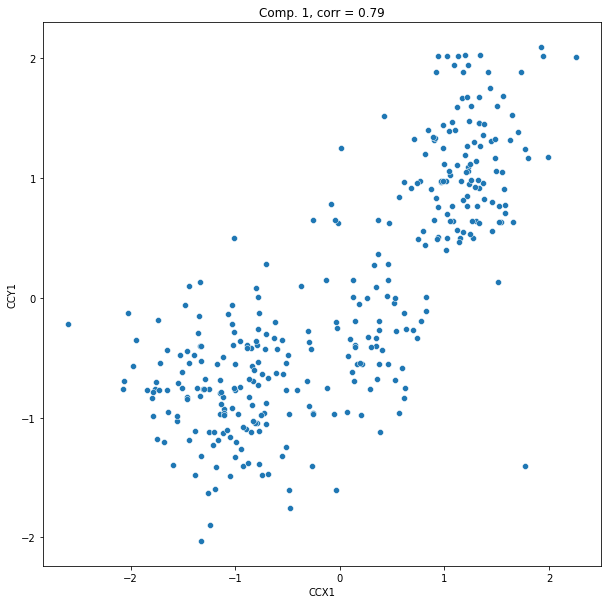

In [15]:
plt.figure(figsize=[10,10])
sns.scatterplot(x='CCX1',y='CCY1',data=dfCCA)
plt.title('Comp. 1, corr = %.2f' %np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])
plt.show()

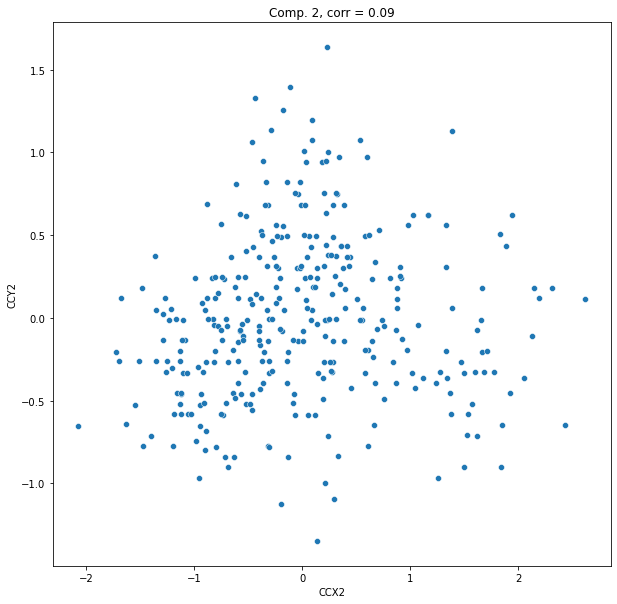

In [16]:
plt.figure(figsize=[10,10])
sns.scatterplot(
    x='CCX2',
    y='CCY2',
    data=dfCCA
)
plt.title('Comp. 2, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])
plt.show()

### collecting different data with Meta-data

In [17]:
dataDicX = {
    'bill_length_mm':X_norm['bill_length_mm'],
    'bill_depth_mm':X_norm['bill_depth_mm'],
    'CCX1':X_c[:,0],
    'CCX2':X_c[:,1],
    'species':df.species.astype('category').cat.codes,
    'island':df.island.astype('category').cat.codes,
    'sex':df.sex.astype('category').cat.codes,
}
dfCCAX = pd.DataFrame(dataDicX)
dfCCAX.head()

,bill_length_mm,bill_depth_mm,CCX1,CCX2,species,island,sex
0,-0.894695,0.779559,-1.186252,-0.010367,0,2,1
1,-0.821552,0.119404,-0.709573,-0.456036,0,2,0
2,-0.675264,0.424091,-0.790732,-0.130809,0,2,0
4,-1.333559,1.084246,-1.718663,-0.073623,0,2,0
5,-0.858123,1.744400,-1.772295,0.736248,0,2,1


In [18]:
dataDicY = {
    'flipper_length_mm':Y_norm['flipper_length_mm'],
    'body_mass_g':Y_norm['body_mass_g'],
    'CCY1':Y_c[:,0],
    'CCY2':Y_c[:,1],
    'species':df.species.astype('category').cat.codes,
    'island':df.island.astype('category').cat.codes,
    'sex':df.sex.astype('category').cat.codes,
}
dfCCAY = pd.DataFrame(dataDicY)
dfCCAY.head()

,flipper_length_mm,body_mass_g,CCY1,CCY2,species,island,sex
0,-1.424608,-0.567621,-1.408795,0.682866,0,2,1
1,-1.067867,-0.505525,-1.053857,0.429879,0,2,0
2,-0.425733,-1.188572,-0.393550,-0.839620,0,2,0
4,-0.568429,-0.940192,-0.542888,-0.458571,0,2,0
5,-0.782474,-0.691811,-0.763548,-0.014204,0,2,1


### Finding the correlations with meta-data
#### observation
_species_ has best correlations with _CCX1_ and _CCY1_    
_sex_ has best correlation with _CCX2_, _CCY2_

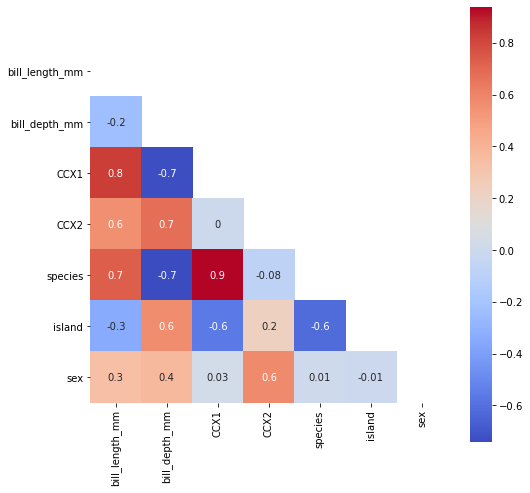

In [19]:
plt.figure(figsize=[8,8])
corrCCAX = dfCCAX.corr()
mask = np.triu(np.ones_like(corrCCAX,dtype=bool))
sns.heatmap(corrCCAX.round(2),cmap="coolwarm",annot=True,fmt='.1g',mask=mask,square=True)
plt.show()

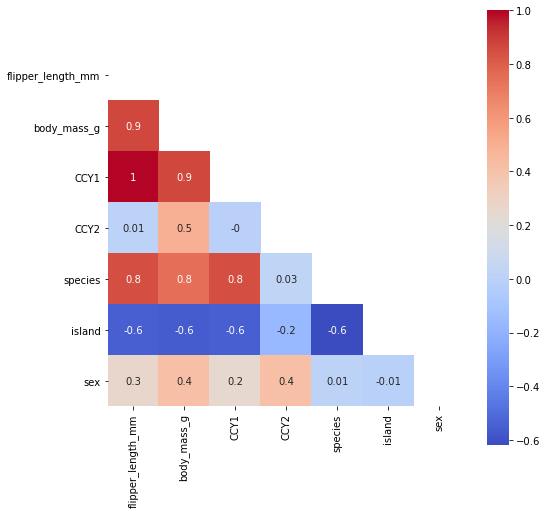

In [20]:
plt.figure(figsize=[8,8])
corrCCAY = dfCCAY.corr()
mask = np.triu(np.ones_like(corrCCAY,dtype=bool))
sns.heatmap(corrCCAY.round(2),cmap="coolwarm",annot=True,fmt='.1g',mask=mask,square=True)
plt.show()

### Plotting correlated data with Meta-data

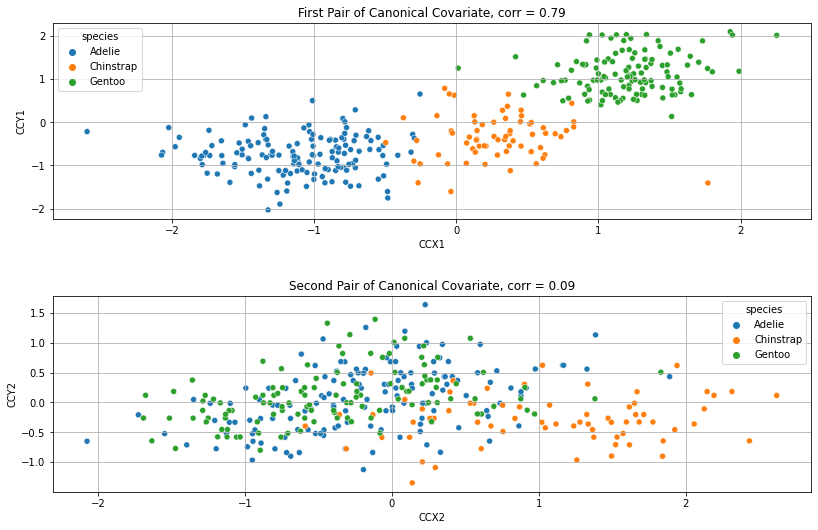

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.scatterplot(x="CCX1",y="CCY1", hue="species", data=dfCCA)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])
plt.grid()

plt.subplot(2,1,2)
sns.scatterplot(x="CCX2",y="CCY2", hue="species", data=dfCCA)
plt.title('Second Pair of Canonical Covariate, corr = %.2f' %np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])
plt.grid()
plt.tight_layout(pad=3)
plt.show()

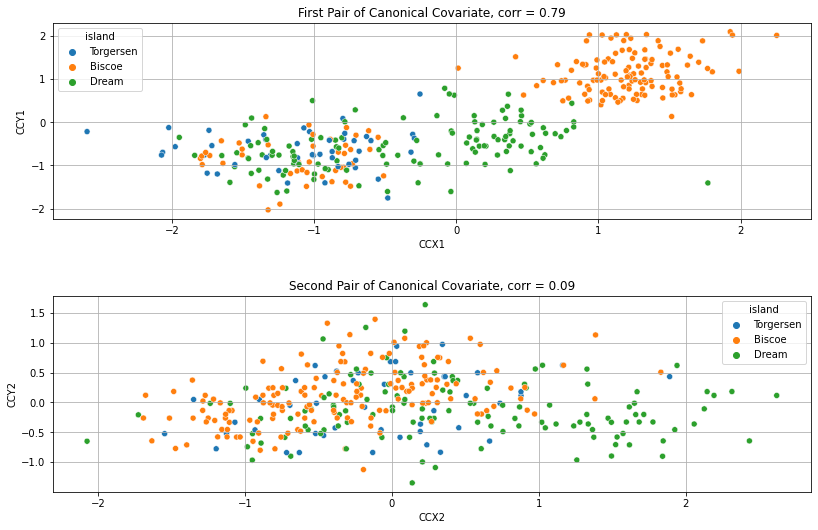

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.scatterplot(x="CCX1",y="CCY1", hue="island", data=dfCCA)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])
plt.grid()

plt.subplot(2,1,2)
sns.scatterplot(x="CCX2",y="CCY2", hue="island", data=dfCCA)
plt.title('Second Pair of Canonical Covariate, corr = %.2f' %np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])
plt.grid()
plt.tight_layout(pad=3)
plt.show()

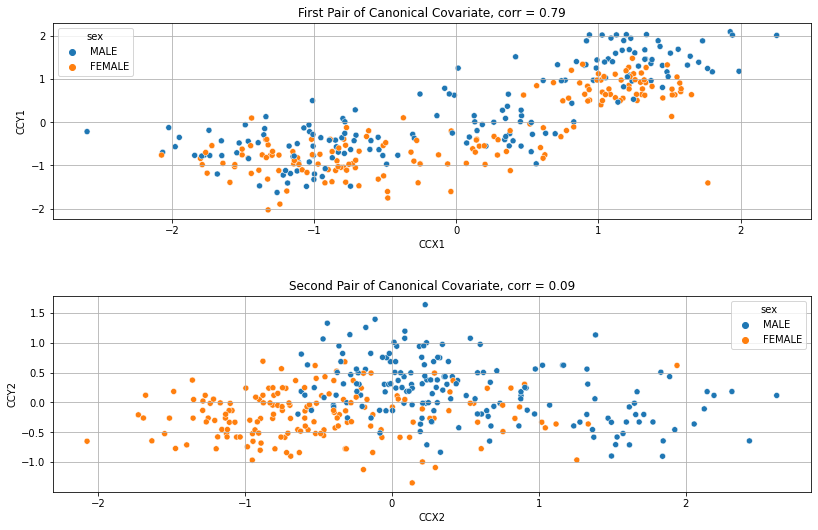

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.scatterplot(x="CCX1",y="CCY1", hue="sex", data=dfCCA)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])
plt.grid()

plt.subplot(2,1,2)
sns.scatterplot(x="CCX2",y="CCY2", hue="sex", data=dfCCA)
plt.title('Second Pair of Canonical Covariate, corr = %.2f' %np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])
plt.grid()
plt.tight_layout(pad=3)
plt.show()

### Best correlated variables are plot with Meta-Data

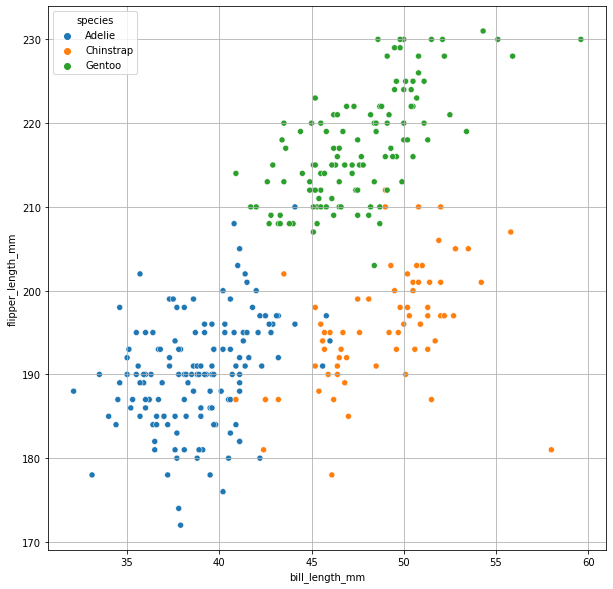

In [24]:
plt.figure(figsize=[10,10])
sns.scatterplot(x="bill_length_mm",y="flipper_length_mm", hue="species", data=df)
plt.grid()
plt.show()

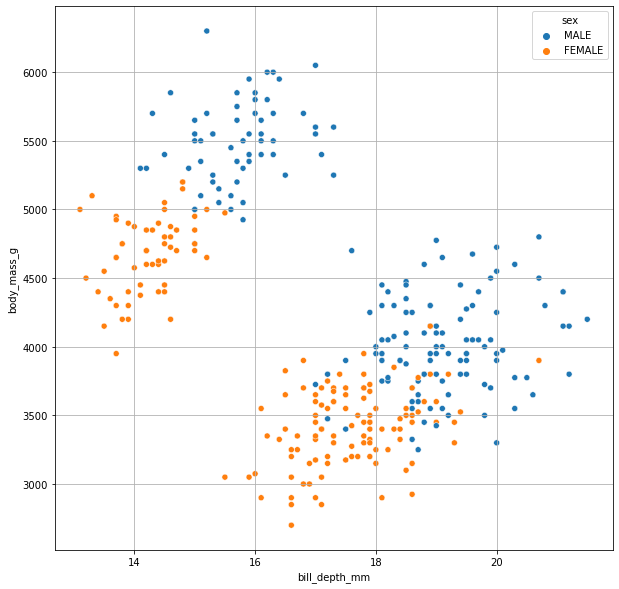

In [25]:
plt.figure(figsize=[10,10])
sns.scatterplot(x="bill_depth_mm",y="body_mass_g", hue="sex", data=df)
plt.grid()
plt.show()

## Conclusion
The __bill length__ and __flipper length__ can use to identify the __Penguin Species__ and the __bill depth__ and __body mass__ can use to differentiate the __Gender__.